In [1]:
import numpy as np
np.random.seed(10)
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding,RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, RFE

In [2]:
#skin dataset - 3 features and 1 target
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
skin_data_raw = pd.read_csv(url,sep='\t',names=['x1','x2','x3','target'])

In [3]:
print(skin_data_raw['target'].unique())
skin_data_raw['target']=skin_data_raw['target'].map({1:0,2:1})
skin_data_raw.head()

[1 2]


,x1,x2,x3,target
0,74,85,123,0
1,73,84,122,0
2,72,83,121,0
3,70,81,119,0
4,70,81,119,0


In [4]:
skin_data_raw['target'].unique()

array([0, 1], dtype=int64)

In [5]:
X = skin_data_raw.values[:,:3]
y = skin_data_raw.values[:,3]

In [12]:
#X_test,y_test used for final model evaluation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
#creating a second subset of the training_data for the second model in the ensamble (logit)
X_train_rf, X_train_lr, y_train_rf, y_train_lr = train_test_split(X_train,y_train,test_size=0.5,random_state=0)

In [6]:
import tree_feature_transformation
import tree_feature_transformation_original
%load_ext autoreload
%autoreload 2

In [20]:
#Random Forest
param_dict = {'n_estimators':10,
              'max_depth':3}
rf_model_original = tree_feature_transformation_original.TreeTransformClf(RandomForestClassifier(n_estimators=10,max_depth=3))
rf_model_original.fit(X_train,y_train)
rf_pred_original = rf_model_original.predict_proba(X_test)[:,1]
fpr_rf_lm_o, tpr_rf_lm_o, _ = roc_curve(y_test, rf_pred_original)

In [21]:
#Random Forest
rf_model = tree_feature_transformation.TreeTransformClf(RandomForestClassifier,tree_params=param_dict,random_state=1)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict_proba(X_test)[:,1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, rf_pred)

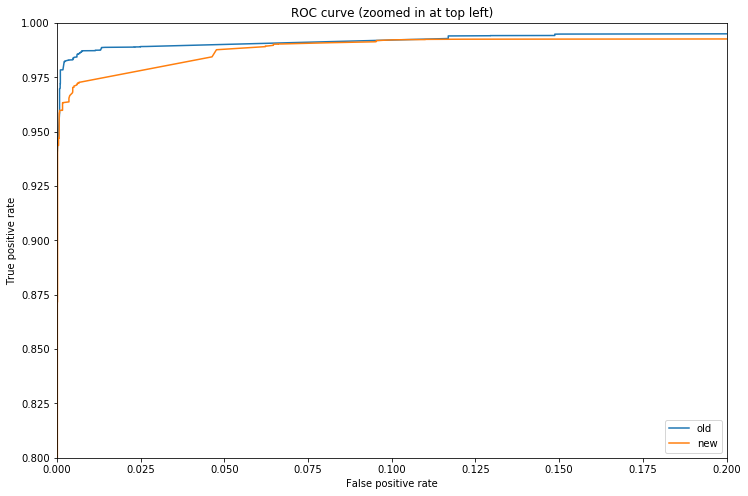

In [22]:
plt.figure(figsize=(12,8))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_lm_o, tpr_rf_lm_o, label='old')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='new')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc=4)
plt.show()